# Assignment 1

In [59]:
# import all the packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import copy
import xgboost as xgb
from sklearn.svm import SVC
from scipy.stats import f_oneway
from sklearn.model_selection import KFold
from feature_engine.outliers import Winsorizer 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [2]:
# read the import files
redUrl = 'https://s3.amazonaws.com/filtereddatasets/Wine_Dine/winequality-red.csv'
whiteUrl = 'https://s3.amazonaws.com/filtereddatasets/Wine_Dine/winequality-white.csv'
red = pd.read_csv(redUrl, sep=',')
white = pd.read_csv(whiteUrl, sep=',')

In [3]:
# red wine
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# white wine
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# check that there is no missing data
print(red.isna().sum())
print(white.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# summary statistics
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# summary statistics
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### pH value and the quality of Red Wine

Text(0.5, 1.0, 'pH value v.s. the quality of wine for red wine')

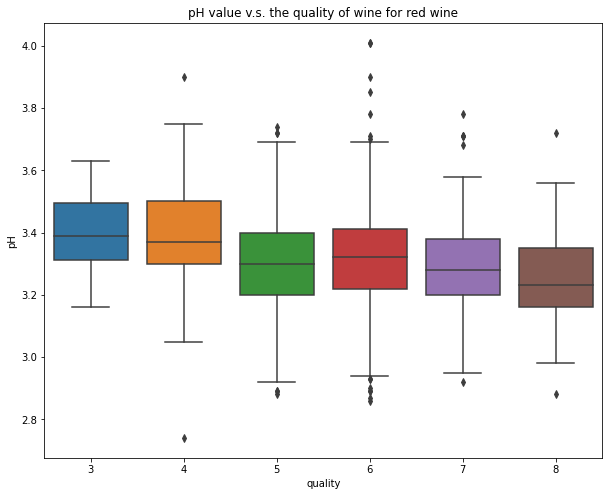

In [8]:
plt.figure(figsize = (10, 8))
sns.boxplot(x=red['quality'], y = red['pH'])
plt.title('pH value v.s. the quality of wine for red wine')

From the above visualization, the general trend is that the red wine with higher quality has a lower pH value. However, we need to test this with hypothesis testing. I use one-way ANOVA, and the null hypothesis is that for all different kinds of quality of red wine, pH value is the same.

In [9]:
# conduct hypothesis testing, using anova 
f_oneway(red[red['quality'] == 3]['pH'],red[red['quality'] == 4]['pH'],
         red[red['quality'] == 5]['pH'],red[red['quality'] == 6]['pH'],
         red[red['quality'] == 7]['pH'],red[red['quality'] == 8]['pH'])

F_onewayResult(statistic=4.341764303214791, pvalue=0.00062843887009581)

As the p-value is 0.0006, we can reject the null hypothesis, and say that pH value has an impact on the quality of wine. So my friend is not true.

### Residual sugar v.s. pH for white wine

<Figure size 720x576 with 0 Axes>

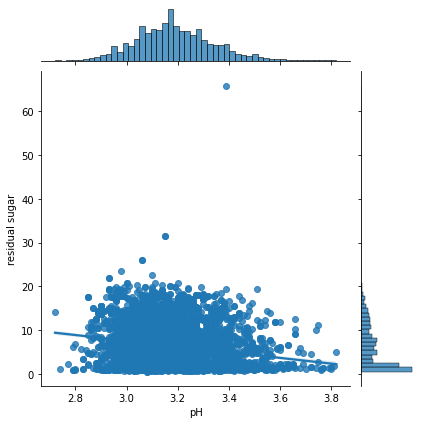

In [10]:
plt.figure(figsize = (10, 8))
grid = sns.JointGrid(x=white['pH'], y = white['residual sugar'])
grid = grid.plot(sns.regplot, sns.histplot)

From the visualization, even though the general trend is that, the high pH, the lower the amount of residual sugar there is, the result is conspicuous, as the residual reguar level is significantly skewed.

### Build a predictive model for the quality of red wine

In [11]:
# transform predicting quality to a binary classification problem
# choose wines with quality below 6 as bad; o/w, as good
bins = (2, 6.5, 8)
names = ['bad', 'good']
red['quality'] = pd.cut(red['quality'], bins = bins, labels = names)
label = LabelEncoder()
red['quality'] = label.fit_transform(red['quality'])
red['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [53]:
# train test split
X = red.drop('quality', axis = 1)
y = red['quality']

# outliers
model = Winsorizer(tail = 'both', fold = 1.5)
model.fit(X)
X = model.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [47]:
def fit_model(clf, name):
    kf = KFold(n_splits = k, shuffle = True)
    
    best_acc = 0
    best_model = None
    best_confusion = None
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        print(f'running fold {i} for {k} fold validation with model {name}.')
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf.fit(X_train, y_train)
        
        test_preds = clf.predict(X_test)
        test_acc = accuracy_score(y_test, test_preds)
        confusion = confusion_matrix(y_test, test_preds).ravel()
        
        if test_acc > best_acc:
            best_acc = test_acc
            best_confusion = confusion.tolist()
            best_model = copy.deepcopy(clf)
    
    print(f"@ Best test accuracy with model {name} is {best_acc: 0.4f}")
    return best_acc

In [48]:
def knn_search():
    accs = []
    for n_neighbors in ks:
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf = make_pipeline(StandardScaler(), model)
        print(f"$ Parameter search for knn with n_neighbor {n_neighbors}")
        acc = fit_model(clf, 'knn')
        accs.append(acc)
    plt.plot(ks, accs)
    plt.title('Classification accuracy v.s. number of neighbors')
    plt.xlabel('number of neighbors')
    plt.ylabel('classification accuracy')
    plt.show()

In [64]:
def forest_search():
    forest = RandomForestClassifier(bootstrap=True)
    search_grid = {
        'bootstrap': [True],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }
    clf = RandomizedSearchCV(estimator = forest, param_distributions = search_grid, n_iter = 100, cv = 10, verbose=1, n_jobs = -1)
    clf.fit(X, y)
    best_params = clf.best_params_
    print(best_params)

In [61]:
def xgb_boost_search():    
    params = { 'max_depth': [3,6,9, 12],
               'learning_rate': [0.01, 0.05, 0.1],
               'n_estimators': [100, 500, 1000],
               'colsample_bytree': [0.3, 0.5, 0.7]}

    xgbr = xgb.XGBRegressor(seed = 20)
    clf = GridSearchCV(estimator=xgbr, 
                       param_grid=params,
                       scoring='neg_mean_squared_error', 
                       verbose=1)
    clf.fit(X, y)
    best_params = clf.best_params_
    print(best_params)

In [62]:
xgb_boost_search()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 1000}


$ Parameter search for knn with n_neighbor 5
running fold 0 for 10 fold validation with model knn.
running fold 1 for 10 fold validation with model knn.
running fold 2 for 10 fold validation with model knn.
running fold 3 for 10 fold validation with model knn.
running fold 4 for 10 fold validation with model knn.
running fold 5 for 10 fold validation with model knn.
running fold 6 for 10 fold validation with model knn.
running fold 7 for 10 fold validation with model knn.
running fold 8 for 10 fold validation with model knn.
running fold 9 for 10 fold validation with model knn.
@ Best test accuracy with model knn is  0.9125
$ Parameter search for knn with n_neighbor 6
running fold 0 for 10 fold validation with model knn.
running fold 1 for 10 fold validation with model knn.
running fold 2 for 10 fold validation with model knn.
running fold 3 for 10 fold validation with model knn.
running fold 4 for 10 fold validation with model knn.
running fold 5 for 10 fold validation with model knn.

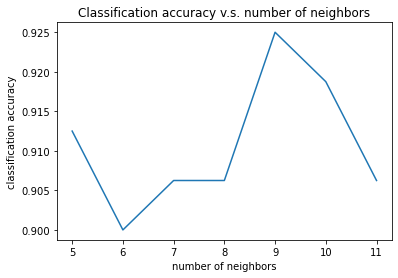

In [51]:
ks = range(5,12)
knn_search()

In [65]:
forest_search()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}


In [67]:
k = 10
svm = SVC(probability = True)
forest = RandomForestClassifier(bootstrap = True, max_depth = 30, min_samples_leaf = 2, 
                                n_estimators = 400, min_samples_split = 5)
knn = KNeighborsClassifier(n_neighbors= 9)
lda = LinearDiscriminantAnalysis()
xgb = xgb.XGBClassifier(learning_rate = 0.05, n_estimators = 1000, max_depth = 12, colsample_bytree = 0.5)

models = [svm, forest, knn, lda, xgb]
names = ['svm', 'random-forest', 'knn', 'lda', 'xgb']
for model, name in zip(models, names):
    model = make_pipeline(StandardScaler(), model)
    fit_model(model, name)

running fold 0 for 10 fold validation with model svm.
running fold 1 for 10 fold validation with model svm.
running fold 2 for 10 fold validation with model svm.
running fold 3 for 10 fold validation with model svm.
running fold 4 for 10 fold validation with model svm.
running fold 5 for 10 fold validation with model svm.
running fold 6 for 10 fold validation with model svm.
running fold 7 for 10 fold validation with model svm.
running fold 8 for 10 fold validation with model svm.
running fold 9 for 10 fold validation with model svm.
@ Best test accuracy with model svm is  0.9187
running fold 0 for 10 fold validation with model random-forest.
running fold 1 for 10 fold validation with model random-forest.
running fold 2 for 10 fold validation with model random-forest.
running fold 3 for 10 fold validation with model random-forest.
running fold 4 for 10 fold validation with model random-forest.
running fold 5 for 10 fold validation with model random-forest.
running fold 6 for 10 fold va

Even though random forest and xgb outperform the rest of the models, we should always be cautious about the potential of overfitting. 